# Intro

This project is made by Open University Computer Science students Vitaly Chait and Gabriel Shapiro. We debated on what our project should be about and we landed on the idea of profanity identification within text. We both saw the need for this type of technology to be implemented within the social media universe and we were both very interested to get to work.

![Profanity_intro](ipnb_images\\profanity_image.jpg)

## The Problem / Solution

There is a constant rise to the number of devices connected to the web (IOT) and the content being spread by different people across the globe. Also, the starting age of the user is constantly decreasing to our new reality, a reality where every elementary school and even kindergarten kids are already surfing in the open web alone without any parent supervising their activity. 

### This leads us to the idea of our final data science & machine learning project.
The project will create a scoring system, that will give a pass \ no pass to content loading to its interface. Underage browsers will be able to see content that is suitable for their age by only including text that matches their threshold of profanity. There are many obstacles that must be tested for in order for the model to have a good reliability rating of correct classification. The english language is very safisticated with its grammar, and the meaning of a sentence can change with one word or one symbol. We will be working with datasets of collected sentences from the internet that we will be able to register inside our testing model and classify each sentence with a profanity grade.

![Profanity_intro](ipnb_images\\profanity_image_kds.jpg)

# 1. INIT and prerequisites 

[Download and install Visual Studio](https://visualstudio.microsoft.com/downloads/)

### If you have an Nvidia GPU you are welcomed to download CUDA 
[CUDA](https://developer.nvidia.com/cuda-downloads) + [cudnn](https://developer.nvidia.com/cudnn)

### Libraries

In [1]:
import platform
import os

print(os.getcwd())

try:
    os.add_dll_directory("C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v11.2/bin")
except:
    print("")
    
print("Python version: {:>30}".format(platform.python_version()))

try:
    import scrapy
except:
    !pip3 install scrapy
print("scrapy version: {:>30}".format(scrapy.__version__))
    
try:
    import cv2
except:
    !pip3 install cv2
print("OpenCV version: {:>30}".format(cv2.__version__))

try:
    import pandas
except:
    !pip3 install pandas
print("pandas version: {:>30}".format(pandas.__version__))

try:
    import PIL
except:
    !pip3 install pillow
print("PIL version: {:>33}".format(PIL.__version__))

try:
    import numpy
except:
    !pip3 install numpy
print("numpy version: {:>32}".format(numpy.__version__))
    
try:
    import joblib
except:
    !pip3 install joblib
print("joblib version: {:>30}".format(joblib.__version__))
    
try:
    import sklearn
except:
    !pip3 install sklearn    
print("sklearn version: {:>30}".format(sklearn.__version__))

try:
    import tensorflow
except:
    !pip3 install tensorflow 
print("tensorflow version: {:>26}".format(tensorflow.__version__))


try:
    import matplotlib
except:
    !pip3 install matplotlib
print("matplotlib version: {:>26}".format(matplotlib.__version__))   

try:
    import IPython
except:
    !pip3 install IPython
print("IPython version: {:>30}".format(IPython.__version__))

try:
    import spacy
except:
    !pip3 install spacy
print("spacy version: {:>31}".format(spacy.__version__))

try:
    import seaborn
except:
    !pip3 install seaborn
print("seaborn version: {:>30}".format(seaborn.__version__))

try:
    import statsmodels
except:
    !pip3 install statsmodels
print("statsmodels version: {:>30}".format(statsmodels.__version__))  

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display

C:\Users\vital\Desktop\uni\data_science\Untitled Folder
Python version:                          3.9.7
scrapy version:                          2.5.0
OpenCV version:                          4.5.1
pandas version:                          1.2.4
PIL version:                             8.2.0
numpy version:                           1.19.5
joblib version:                          1.0.1
sklearn version:                         0.24.2
tensorflow version:                      2.6.0
matplotlib version:                      3.4.3
IPython version:                         7.27.0
spacy version:                           3.1.3
seaborn version:                         0.11.2


![Profanity_intro](ipnb_images\\python_libraries.jpg)

##### @GPU_ENABLED - set True or False the parameter below for activation
![gpu_activation](ipnb_images\\true_false_sign.jpg)

In [2]:
GPU_ENABLED = True # Change to False if you don't have GPU

In [3]:
if GPU_ENABLED:
    physical_devices = tensorflow.config.list_physical_devices('GPU')
    print("Num GPUs:", len(physical_devices))
    try:
        spacy.prefer_gpu()
    except:
        print("Not able to activate gpu")

Num GPUs: 1


Hi reader, if you wish to optimize performence more you can read the link below
[Feel free to read more about optimizations](https://spacy.io/usage/processing-pipelines)

![Profanity_intro](ipnb_images\\databases.png)

# 2. Data and Data Collection

### 2.1 We create a Scrapy crawling code to gather data from the web for us

![Profanity_intro](ipnb_images\\web_crawling.png)

##### @Crawl - Set this parameter to "True" or "False" if you wish to activate it
![crawl_activation](ipnb_images\\true_false_sign.jpg)

In [4]:
activate_crawl = False

### Data_C scrappy code below Files - Format is ("file_name.py", path) - Unpack to see the code written for this project 

####  "items.py" file --> scrapygoodnews\scrapygoodnews\items.py

In [5]:
import scrapy

class ScrapygoodnewsItem(scrapy.Item):
    story = scrapy.Field()
    url = scrapy.Field()

#### "goodnews_scrape.py" file --> scrapygoodnews\scrapygoodnews\spiders\goodnews_scrape.py

In [6]:
import scrapy
from scrapygoodnews.scrapygoodnews.items import ScrapygoodnewsItem

class Goodnews(scrapy.Spider):
    name = "my_scraper"
    custom_settings = {
        'FEEDS': {
            'scrapygoodnews\scrapygoodnews\output\stories.csv': {
                'format': 'csv',
                'overwrite': True
            }
        }}

    allowed_domains = ['www.goodnewsnetwork.org']
    # First Start Url
    start_urls = ["https://www.goodnewsnetwork.org/category/news/page/1/"]
    n_pages = 10**7

    for i in range(2, n_pages):
        start_urls.append("https://www.goodnewsnetwork.org/category/news/page/" + str(i))

    def parse(self, response):
        for href in response.xpath(
                '//h3[@class="entry-title td-module-title"]//@href').extract():
            yield scrapy.Request(href, callback=self.parse_dir_contents)

    def parse_dir_contents(self, response):
        item = ScrapygoodnewsItem()

        # Getting Story
        story_list = response.xpath('//div[@class="td-post-content"]//p/text()').extract()
        story_list = [x.strip() for x in story_list if len(x.strip()) > 0]

        if len(story_list) > 0:
            item['story'] = " ".join(story_list)# Url (The link to the page)
            item['url'] = response.xpath("//meta[@property='og:url']/@content").extract()
            yield item
        else:
            pass

#### settings.py --> \scrapygoodnews\scrapygoodnews\settings.py

In [7]:
# Partial snippet
"""
USER_AGENT = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36'
LOG_LEVEL = logging.WARNING
COOKIES_ENABLED = False
TELNETCONSOLE_ENABLED = False
"""
print()

#### run_spider_file.py --> \scrapygoodnews\scrapygoodnews\run_spider_file.py

In [8]:
from scrapygoodnews.scrapygoodnews.spiders.goodnews_scrape import Goodnews
import scrapygoodnews.scrapygoodnews.settings as my_settings
from scrapy.settings import Settings
from scrapy.crawler import CrawlerProcess

stop_after_crawl = True

def run_spider():
    """run spider with Goodnews"""
    # Import settings from project and not terminal default path
    crawler_settings = Settings()
    crawler_settings.setmodule(my_settings)

    crawler = CrawlerProcess(crawler_settings)
    # Avoid Twisted reactor issue - For running the same notebook
    print("Spider start running\n /╲/\\(╭ •̀ •́╮)/\\╱\\ \t /╲/\\(╭ •̀ •́╮)/\╱\\ \t /╲/\\(╭ •̀ •́╮)/\\╱\\")
    crawler.crawl(Goodnews)
    crawler.start(stop_after_crawl=stop_after_crawl)
    print("Spider end")

In [9]:
from scrapygoodnews.scrapygoodnews.run_spider_file import run_spider

if activate_crawl:
    run_spider()

![Profanity_intro](ipnb_images\\data_engineer.jpg)

### 2.2 The Data

We will begin with explaining the datasets that we are working with. These are built quite differently.


#### 2.2.1 Data_a
The dataset contains twitter comments with a class column that that gives 1 if there is offensive language, 0 if there is hate speech and 2 if there is neither.


#### 2.2.2 Data_b
The dataset is from wikipedia texts classifies whether each text is toxic speech or threatining speech or other types, and we were able to take that and say that if any of those classifications exist that we can label it as profane language.


#### 2.2.3 Data_c
We will also use data from sources that were not manually labeled as part of a sponsored project (Keggle/etc..), this type of data is generated from known sources with high rate of success being correct without manual verification. 
We used scrappy opensource package to crawl "https://www.goodnewsnetwork.org/" and extract the text from the articles that were posted there. 


#### 2.2.4 Data_d, e, f, g, h
Random lists of bad words we found online that come in different formats

####  2.2.5 Data - Source URLS

##### 2.2.5.1 Labled Datasets
[Database 1 - Source](https://github.com/t-davidson/hate-speech-and-offensive-language/tree/master/data)

[Database 2 - Source](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/)


##### 2.2.5.2 Scrapy
[The good news network website](https://www.goodnewsnetwork.org/more/about-us/)


##### 2.2.5.3 Bad words lists
[DB4](https://github.com/web-mech/badwords/blob/master/lib/lang.json)
[DB5](http://www.bannedwordlist.com/)
[DB6](https://www.freewebheaders.com/bad-words-list-and-page-moderation-words-list-for-facebook/)
[DB7](https://www.freewebheaders.com/youtube-blacklist-words-list-youtube-comment-moderation/)
[DB8](https://www.freewebheaders.com/full-list-of-bad-words-banned-by-google/)

![reading_data](ipnb_images\\reading_data.png)

## 2.3 Handling the data

After we gather the datasets that we want to use we have to clean the text of any superfluous characters that will not help us with detremining the sentiment of the sentence. 
The template should be some how similiar to "yes \ no" of whether the text (sentences) are offensive or not.

So the goal is that for each row  we shall provide a binary indexing of "Offensive" or not. 
To have a uniform text template we shall use filtering techniques such as splits of the parahraph to sentences, tokenizations, characters removals and more. 
In addition we shall add another column of the words counts. This can help with determing the "weight" of the word on the sentence

##### @Database acivation - Set this parameter to "True" or "False" if you wish to activate
![db_activation](ipnb_images\\true_false_sign.jpg)

In [10]:
activate_db_filtering = True

### 2.3.1 First we will impot the required packages and load all the data into Pandas framework 

In [11]:
import pandas as pd
import re
import swifter
from spacy import load 
from spacy.tokenizer import Tokenizer
from nltk.tokenize import sent_tokenize, word_tokenize, TweetTokenizer, WhitespaceTokenizer
from nltk.stem import PorterStemmer
import time
import string

In [12]:
if activate_db_filtering:
    data_a = pd.read_csv(r'materials\Cornnel\data\data\labeled_data.csv')
    data_b = pd.read_csv(r'materials\Kaggle\train\train.csv')
    data_c = pd.read_csv(r'scrapygoodnews\scrapygoodnews\output\stories.csv')
    data_d = pd.read_json(r'materials\badwords\word_list_a.json')
    data_e = pd.read_csv(r'materials\badwords\swearWords.csv')
    data_f = pd.read_csv(r'materials\badwords\format_b\facebook-bad-words-list_comma-separated-text-file_2021_01_18.txt', sep="\n")
    data_g = pd.read_csv(r'materials\badwords\format_b\youtube-blacklist-words-list_comma-separated-text-file_2021-01-19.txt', sep="\n")
    data_h = pd.read_csv(r'materials\badwords\full-list-of-bad-words_csv-file_2021_01_18\full-list-of-bad-words_csv-file_2021_01_18.csv')
else:
    balanced = pd.read_csv(r'output\database\balanced.csv', )

##### The format of is:
1. Have a peak on the data
2. Fine tune it
3. Have another peak on it

![filtering_data](ipnb_images\\filtering_data.jpg)

#### 2.3.1.1 Data - A

In [13]:
if activate_db_filtering:
    display(data_a.head())

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


By peaking on the database structure, we see that it has more than 2 classifications classes. The first step is to transform it to binary (Offensive or not offensive?).
Later, we see that this data was imported from a database with Tweets, it makes sense to use the NLTK TweetTokenizer to handel the data.
Finally we use some regular expression replacments to remove unwanted string sequences from the tweet.

In [14]:
if activate_db_filtering:
    data_a_positive = data_a[data_a["class"]==2]
    data_a_positive = pd.DataFrame(data_a_positive["tweet"])
    data_a_positive = data_a_positive.rename(columns={"tweet": "Text"})
    data_a_positive = data_a_positive.assign(Negative=[0 for i in range(len(data_a_positive))])

    data_a_negative = data_a[data_a["class"]!=2]
    data_a_negative = pd.DataFrame(data_a_negative["tweet"])
    data_a_negative = data_a_negative.rename(columns={"tweet": "Text"})
    data_a_negative = data_a_negative.assign(Negative=[1 for i in range(len(data_a_negative))])


    data_a_labeled = pd.concat([data_a_positive, data_a_negative], axis=0)

    tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)

    data_a_labeled['Text'] = data_a_labeled['Text'].swifter.apply(tknzr.tokenize)
    data_a_labeled['Text'] = data_a_labeled['Text'].swifter.apply(" ".join)

    data_a_labeled["Text"] = data_a_labeled["Text"].str.replace('\n', ' ', regex=False)
    data_a_labeled["Text"] = data_a_labeled["Text"].str.replace(r'("|! ! ! rt :)' , '', regex=True)
    data_a_labeled["Text"] = data_a_labeled["Text"].str.replace(r'(rt : )' , '', regex=True)

Pandas Apply:   0%|          | 0/24783 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/24783 [00:00<?, ?it/s]

In [15]:
if activate_db_filtering:
    display(data_a_labeled)

,Text,Negative
0,! ! ! RT : As a woman you shouldn't complain a...,0
40,momma said no pussy cats inside my doghouse,0
63,: - SimplyAddictedToGuys http://t.co/1jL4hi8Z...,0
66,: http://t.co/3gzUpfuMev woof woof and hot s...,0
67,: Lemmie eat a Oreo & do these dishes . One ...,0
...,...,...
24776,you're all niggers,1
24777,you're such a retard i hope you get type 2 dia...,1
24778,you's a muthaf * * * in lie “ : right ! His TL...,1
24780,young buck wanna eat ! ! .. dat nigguh like I ...,1


#### 2.3.1.2 Data - B 
The data is slighly different but the general idea is the same. Transform to binary classes and remove unwated string sequences.

In [16]:
if activate_db_filtering:
    display(data_b.head())

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [17]:
if activate_db_filtering:
    data_b_positive = data_b.loc[(data_b['toxic']==0) & (data_b['severe_toxic']==0) & (data_b['obscene']==0) & (data_b['threat']==0) 
                                & (data_b['insult']==0) & (data_b['identity_hate']==0)]

    data_b_positive = pd.DataFrame(data_b_positive["comment_text"])
    data_b_positive = data_b_positive.rename(columns={"comment_text": "Text"})
    data_b_positive = data_b_positive.assign(Negative=[0 for i in range(len(data_b_positive))])

    data_b_negative = data_b.loc[(data_b['toxic']==1) | (data_b['severe_toxic']==1) | (data_b['obscene']==1) | (data_b['threat']==1) 
                                | (data_b['insult']==1) | (data_b['identity_hate']==1)]
    data_b_negative = pd.DataFrame(data_b_negative["comment_text"])
    data_b_negative = data_b_negative.rename(columns={"comment_text": "Text"})
    data_b_negative = data_b_negative.assign(Negative=[1 for i in range(len(data_b_negative))])


    data_b_labeled = pd.concat([data_b_positive, data_b_negative], axis=0)
    data_b_labeled["Text"] = data_b_labeled["Text"].str.replace('\n', ' ', regex=False)
    data_b_labeled["Text"] = data_b_labeled["Text"].str.replace('"', '', regex=False)

In [18]:
if activate_db_filtering:
    display(data_b_labeled)

,Text,Negative
0,Explanation Why the edits made under my userna...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,More I can't make any real suggestions on imp...,0
4,"You, sir, are my hero. Any chance you remember...",0
...,...,...
159494,our previous conversation you fucking shi...,1
159514,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1
159541,Your absurd edits Your absurd edits on great...,1
159546,Hey listen don't you ever!!!! Delete my edit...,1


#### 2.3.1.3 Data - C
Our Scrapy collection

In [19]:
if activate_db_filtering:
    display(data_c.head())

,story,url
0,A landfill of 42 million tires in the sands of...,https://www.goodnewsnetwork.org/kuwait-tire-mo...
1,If you feel like you’re hoarding plastic conta...,https://www.goodnewsnetwork.org/americans-hoar...
2,A design for plastic bottles that can be linke...,https://www.goodnewsnetwork.org/friendship-bot...
3,Manchester City are the reigning champions of ...,https://www.goodnewsnetwork.org/manchester-cit...
4,"There may be a thousand ways to say, ‘Happy Bi...",https://www.goodnewsnetwork.org/restaurant-bra...


##### 2.3.1.3.1 Porter Stemming 
We can use porter stemming to reduce the complexity, I eventually chose not to use it

![porter_stemming](ipnb_images\\porter_stemming.png)

##### @Porter stemming acivation - Set this parameter to "True" or "False"
![porter_activation](ipnb_images\\true_false_sign.jpg)

In [20]:
porter_filtering = False

In [21]:
if activate_db_filtering:
    data_c_story = pd.DataFrame(data_c["story"])
    splitted_data = [] 
    
    if porter_filtering:
        porter = PorterStemmer()
        for text in data_c_story["story"]:
            splitted_sent = sent_tokenize(text)
            for sent in splitted_sent:
                token_words = word_tokenize(sent)
                portered = [porter.stem(word) for word in token_words]
                splitted_data.append(" ".join(portered))
    else:
        for text in data_c_story["story"]:
            splitted = sent_tokenize(text)
            for i in splitted:
                splitted_data.append(i)
    
    splitted_data = pd.DataFrame(splitted_data, columns=["Text"])
    data_c_labeled = splitted_data.assign(Negative=[0 for i in range(len(splitted_data))])
        

In [22]:
if activate_db_filtering:
    display(data_c_labeled)

,Text,Negative
0,A landfill of 42 million tires in the sands of...,0
1,This news in itself would be a major relief to...,0
2,But the government isn’t stopping there.,0
3,"They are aiming to create a green city of 25,0...",0
4,The first step is to clear the ground.,0
...,...,...
9586,A generous couple has been secretly stuffing m...,0
9587,Krystal Duhaney is a registered nurse and the ...,0
9588,"A soon-to-be mother of three, when she and her...",0
9589,"Now they’re in a better place financially, the...",0


#### 2.3.1.4 Data - D --> Data H
More data, this time a lists of negative words

In [23]:
if activate_db_filtering:
    display(data_d.head())

,words
0,ahole
1,anus
2,ash0le
3,ash0les
4,asholes


In [24]:
if activate_db_filtering:
    data_d_labeled = data_d.rename(columns={"words": "Text"})
    data_d_labeled = data_d_labeled.assign(Negative=[1 for i in range(len(data_d_labeled))])
    

In [25]:
if activate_db_filtering:
    display(data_d_labeled)

,Text,Negative
0,ahole,1
1,anus,1
2,ash0le,1
3,ash0les,1
4,asholes,1
...,...,...
442,wetback*,1
443,wichser,1
444,wop*,1
445,yed,1


In [26]:
if activate_db_filtering:
    display(data_e.head())

,anal,anus,arse,ass,ballsack,balls,bastard,bitch,biatch,bloody,...,smegma,spunk,tit,tosser,turd,twat,vagina,wank,whore,wtf


In [27]:
if activate_db_filtering:
    data_e_labeled = [[i, 1] for i in data_e]
    data_e_labeled = pd.DataFrame(data_e_labeled, columns = ["Text", "Negative"])

In [28]:
if activate_db_filtering:
    display(data_e_labeled)

,Text,Negative
0,anal,1
1,anus,1
2,arse,1
3,ass,1
4,ballsack,1
...,...,...
72,twat,1
73,vagina,1
74,wank,1
75,whore,1


In [29]:
if activate_db_filtering:
    display(data_f.tail())

,## Facebook Page Moderation Words List (Comma Separated Text File)
4,## URL: https://www.freewebheaders.com/bad-wor...
5,## Copy all the words below:
6,----------------------------------------
7,"4r5e, 5h1t, 5hit, a55, anal, anus, ar5e, arrse..."
8,----------------------------------------------...


In [30]:
if activate_db_filtering:
    data_f_labeled = data_f.iloc[7]
    data_f_labeled = [[i,1] for i in data_f_labeled[0].split(",")]
    data_f_labeled = pd.DataFrame(data_f_labeled, columns = ["Text", "Negative"])

In [31]:
if activate_db_filtering:
    display(data_f_labeled)

,Text,Negative
0,4r5e,1
1,5h1t,1
2,5hit,1
3,a55,1
4,anal,1
...,...,...
1008,xx,1
1009,yaoi,1
1010,yellow showers,1
1011,yiffy,1


In [32]:
if activate_db_filtering:
    display(data_g.tail())

,## Youtube Blacklist Words List (Comma-separated-Text-File)
3,## URL: https://www.freewebheaders.com/youtube...
4,## Copy all the words below:
5,## -----------------------------------
6,"2 girls 1 cup, 2g1c, 4r5e, 5h1t, 5hit, a$$, a$..."
7,----------------------------------------------...


In [33]:
if activate_db_filtering:
    data_g_labeled = data_g.iloc[6]
    data_g_labeled = [[i,1] for i in data_g_labeled[0].split(",")]
    data_g_labeled = pd.DataFrame(data_g_labeled, columns = ["Text", "Negative"])

In [34]:
if activate_db_filtering:
    display(data_g_labeled)

,Text,Negative
0,2 girls 1 cup,1
1,2g1c,1
2,4r5e,1
3,5h1t,1
4,5hit,1
...,...,...
3461,yiffy,1
3462,yobbo,1
3463,zoophile,1
3464,zoophilia,1


In [35]:
if activate_db_filtering:
    display(data_h.head())

,2 girls 1 cup,Unnamed: 1,Unnamed: 2,## Full List of Bad Words (CSV File)
0,2g1c,NaN,NaN,==============================
1,4r5e,NaN,NaN,NaN
2,5h1t,NaN,NaN,## This Full List of Words is provided free b...
3,5hit,NaN,NaN,NaN
4,a$$,NaN,NaN,"## Last Update: Jan 18, 2021"


In [36]:
if activate_db_filtering:
    data_h_labeled = data_h.iloc[:, 0]
    data_h_labeled = [[i, 1] for i in data_h_labeled]
    data_h_labeled = pd.DataFrame(data_h_labeled, columns = ["Text", "Negative"])

In [37]:
if activate_db_filtering:
    display(data_h_labeled)

,Text,Negative
0,2g1c,1
1,4r5e,1
2,5h1t,1
3,5hit,1
4,a$$,1
...,...,...
1728,yiffy,1
1729,yobbo,1
1730,zoophile,1
1731,zoophilia,1


# 3. Cleaning the data futher for our EDA
Concating all the data from all different sources into 1 uniformed data frame 

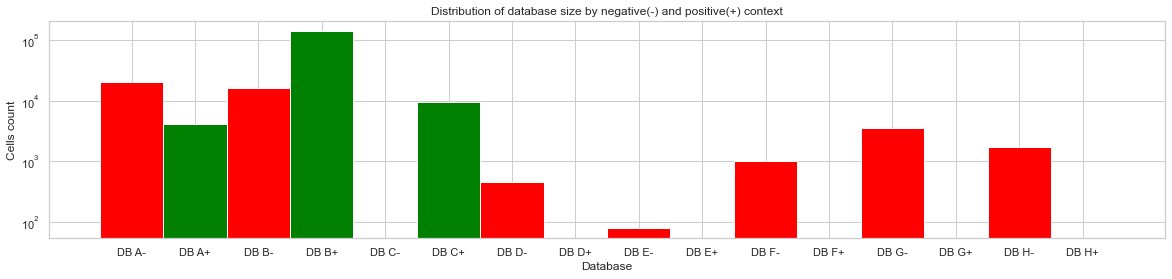

In [103]:
if activate_db_filtering:
    data_dis = pd.DataFrame([len(data_a_labeled[data_a_labeled["Negative"]==1]), len(data_a_labeled[data_a_labeled["Negative"]==0])]+[len(data_b_labeled[data_b_labeled["Negative"]==1]), len(data_b_labeled[data_b_labeled["Negative"]==0])]+[len(data_c_labeled[data_c_labeled["Negative"]==1]), len(data_c_labeled[data_c_labeled["Negative"]==0])]+[len(data_d_labeled[data_d_labeled["Negative"]==1]), len(data_d_labeled[data_d_labeled["Negative"]==0])]+[len(data_e_labeled[data_e_labeled["Negative"]==1]), len(data_e_labeled[data_e_labeled["Negative"]==0])]+[len(data_f_labeled[data_f_labeled["Negative"]==1]), len(data_f_labeled[data_f_labeled["Negative"]==0])]+[len(data_g_labeled[data_g_labeled["Negative"]==1]), len(data_g_labeled[data_g_labeled["Negative"]==0])]+[len(data_h_labeled[data_h_labeled["Negative"]==1]), len(data_h_labeled[data_h_labeled["Negative"]==0])])
    plt_x_axis = []
    color_axis = []
    [[color_axis.append("Red"), color_axis.append("Green"), plt_x_axis.append("DB "+chr(65+i)+"-"),plt_x_axis.append("DB "+chr(65+i)+"+")] for i in range(int(len(data_dis[0])/2))]
    plt.figure(figsize=(20, 4))
    plt.bar(plt_x_axis, data_dis[0], width=1, log=True, color=color_axis)
    plt.title('Distribution of database size by negative(-) and positive(+) context')
    plt.ylabel("Cells count")
    plt.xlabel("Database")
    print()
else:
    color_axis = ["Red", "Green"]

In [104]:
if activate_db_filtering:
    data_unfinished = pd.concat([data_a_labeled,data_b_labeled,data_c_labeled, data_d_labeled, data_e_labeled, data_f_labeled, data_g_labeled, data_h_labeled], axis=0)

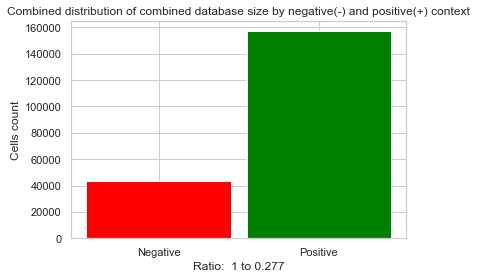

In [105]:
if activate_db_filtering:
    neg = len(data_unfinished[data_unfinished["Negative"]==1])
    pos = len(data_unfinished[data_unfinished["Negative"]==0])
else:
    neg = len(balanced[balanced["Negative"]==1])
    pos = len(balanced[balanced["Negative"]==0])

ratio = min(neg, pos)/max(neg, pos)

plt.bar(["Negative","Positive"], [neg, pos], width=0.9, color=color_axis)
plt.title('Combined distribution of combined database size by negative(-) and positive(+) context')
plt.ylabel("Cells count")
plt.xlabel("Ratio:  1 to {}".format(round(ratio,3)))
print()

### 3.1 There are, unsuprisingly due to our data sources, more positive sentences than offensive. 

We can, by design, split the data to have the same number of positive and negative rows.
We will also shuffel the rows to have a uniformed data spread along the sheet.

##### Split - set this parameter to "True" or "False" if you wish to have balanced negative and positive sentences
![split_activation](ipnb_images\\true_false_sign.jpg)

In [106]:
# Enable this to have 50%/50% of negative and positive
split_data = True

In [107]:
if activate_db_filtering:
    if split_data:
        if neg>pos:
            negative_finished = data_unfinished[data_unfinished["Negative"]==1].sample(frac = ratio)
            positive_finished = data_unfinished[data_unfinished["Negative"]==0]
        else:
            positive_finished = data_unfinished[data_unfinished["Negative"]==0].sample(frac = ratio)
            negative_finished = data_unfinished[data_unfinished["Negative"]==1]

        # Concat 50/50 datasets 
        balanced = pd.concat([positive_finished,negative_finished], axis=0)
        # Shuffle the rows 
        balanced = balanced.sample(frac = 1).reset_index(drop=True)
        data_unbalanced = data_unfinished.sample(frac = 1).reset_index(drop=True)
    else:
        data_unbalanced = data_unfinished.sample(frac = 1).reset_index(drop=True)
        balanced = data_unbalanced

In [359]:
display(balanced[balanced["Negative"]==0])

,Text,Negative,sentences,Number of words,Weight per word,AverageLength,Positive,Negative Word
0,goddamned,0,goddamne,1,1.000000,8.000000,1,1
4,if a bitch would everrr,0,bitch everrr,2,0.500000,5.500000,1,1
5,he is been drinking too much of that shitty ca...,0,drink shitty canadian hos beer eh,6,0.166667,4.666667,1,1
7,honky,0,honky,1,1.000000,7.000000,1,1
9,foad,0,foad,1,1.000000,6.000000,1,1
...,...,...,...,...,...,...,...,...
87156,dagos,0,dago,1,1.000000,4.000000,1,1
87157,is dat sum hermaphrodite lolololololololollol...,0,dat sum hermaphrodite lolololololololollolol...,4,0.250000,18.000000,1,1
87158,i am literally about to scream and throw a bit...,0,literally scream throw bitch fit people hurry ...,8,0.125000,5.375000,1,1
87160,i am not much of a texted get off my nuttz hoe,0,texte nuttz hoe,3,0.333333,4.333333,1,1


In [358]:
display(balanced[balanced["Negative"]==1])

,Text,Negative,sentences,Number of words,Weight per word,AverageLength,Positive,Negative Word
1,more or less have you done the research for m...,1,research worry tool rapidity yes easy judge ...,86,0.011628,5.279070,0,0
2,huh he is not notable 6 months in a subsuppor...,1,huh notable 6 month subsupporting role stron...,8,0.125000,5.875000,0,0
3,check out 162 and 273 on,1,check 162 273,3,0.333333,3.666667,0,0
6,whooopssorry about that i have done just a li...,1,whooopssorry little editing project carry lo...,13,0.076923,6.307692,0,0
8,she saved us all hello boy and girl she saved...,1,save hello boy girl save sink titanic javale...,10,0.100000,4.900000,0,0
...,...,...,...,...,...,...,...,...
87151,redirect talkpremière tv channel,1,redirect talkpremière tv channel,4,0.250000,7.250000,0,0
87153,the historians you quote are not remotely well...,1,historian quote remotely known final,5,0.200000,6.400000,0,0
87154,oswah the article claims he was born in st pet...,1,oswah article claim bear st petersburg live 11...,76,0.013158,6.394737,0,0
87155,“but there is a notable exception—the natural ...,1,""" notable exception — natural world well today...",29,0.034483,5.965517,0,0


### 3.2 Generalize our data so that the NLP model behaves as accurate as possible

In NLP, models treat words like Dog and dog differently, even if they are the same. Therefore, to overcome this problem, we lowercase the words. Here, I am using the lower() function available in Python for converting text to lowercase.
Punctuations are the marks in English like commas, hyphens, full stops, etc. These are important for English grammar but not for text analysis. Therefore, they need to be removed.
Contractions are the shortened versions of words like don’t for do not. We need to expand these contractions for a better analysis of text. 

In [110]:
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

if activate_db_filtering:
    balanced["Text"] = balanced["Text"].astype(str)
    balanced["Text"] = balanced["Text"].swifter.apply(lambda x:expand_contractions(x))
    balanced['Text'] = balanced['Text'].swifter.apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
    balanced['Text'] = balanced['Text'].swifter.apply(lambda x: x.lower())
    balanced["Text"] = balanced["Text"].str.replace('  ', ' ', regex=False)
    balanced = balanced[(balanced[["Text"]] != "").all(axis=1)]
    display(display(balanced.tail()))

Pandas Apply:   0%|          | 0/87162 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/87162 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/87162 [00:00<?, ?it/s]

,Text,Negative
87157,is dat sum hermaphrodite lolololololololollol...,1
87158,i am literally about to scream and throw a bit...,1
87159,such a shambles would be funny if it were not ...,0
87160,i am not much of a texted get off my nuttz hoe,1
87161,rt “ i cannot stand no messy hoe ” 1⃣0⃣0⃣0⃣ tr...,1


None

### 3.3 Eventually we will tokenize the data with the same common tokenizer.

To give a sense of generalization to the data and make it even more uniformed we add an optional feature to transform the data once again with tokenizer.
We chose to use NLTK regex as a our final tokenizer and not other due to its speed.

![token_benchmark](ipnb_images\\token_benchmark.png)

Alterntaive option is to use Spacy as a our final tokenizer and not NLTK. This is because while NLTK tokenizers can have a better taylor made solutions, Spacy tokenizer has a better "Single point solution" that generally suits all text sources.

It is important to note that usually any kind of generalization can reduce the accuracy of our model. In other words, our method will not provide the best reulsts but because the field of tokenization can have a whole notebook of itself we do not want to waste major time on that. Our point here is to enable high flexability for our datasets. Anu user might choose to add or remove some of sets in the future and will not need to customize a lot of the code. 

Also, as a side note, for dataset "A" we used NLTK tweeter custom made tokenizer. For dataset "B" we used the sentences NLTK tokenizer that provides faster tokenization.

Because of the Spacy DependencyParser, the operation takes some time. If you run it, let the computer work for a while you drink a cup of coffee a refresh ;)

[Read more about Spacy here](https://spacy.io/)
![spacy_token](ipnb_images\\spacy_token.png)
![spacy_perfo](ipnb_images\\spacy_perfo.png)

##### @Spacy_enabled - set True or False the parameter below for activation
![spacy_enabled](ipnb_images\\true_false_sign.jpg)

In [111]:
spacy_enabled = True
nltk_regex = not spacy_enabled

In [112]:
if activate_db_filtering:
    if spacy_enabled:
        try:
            sp = spacy.load('en_core_web_sm')
        except:
            !python -m spacy download en_core_web_sm

        sp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
        
        # Lemmatization with stopwords removal
        balanced['sentences']=balanced['Text'].swifter.apply(lambda x: ' '.join([token.lemma_ for token in list(sp(x)) if (token.is_stop==False)]))
        
        #sent = list(sp.pipe(balanced["Text"]))
        #balanced = balanced.assign(Tokenized=sent)
        #sentences = [" ".join(row.sents) for row in sent]
        #balanced = balanced.assign(sentences=sentences)
    
    elif nltk_regex:
        ws_tokenize = WhitespaceTokenizer()
        balanced['sentences'] = balanced['Text'].swifter.apply(ws_tokenize.tokenize)
        balanced['sentences'] = balanced['sentences'].swifter.apply(" ".join)
        
    balanced = balanced[(balanced[["sentences"]] != "").all(axis=1)]

Pandas Apply:   0%|          | 0/87160 [00:00<?, ?it/s]

### 3.4 Weight per word


We can also give weight, per word, for the sentence meaning. 

We must surely understand by now that "Fuck", a 1 word curse said alone, clearly has a negative meaning.
While other sentences, such as: "What the fuck just happend", has slighly less negative meaning.

Lets try to give these sentences weight by the inverse of the number of words

In [418]:
# We will seperate by the word counts
pattern = re.compile(r'\w+')
balanced['Number of words'] = balanced['sentences'].swifter.apply(lambda x: max(1, len(pattern.findall(x))))
balanced['Weight per word'] = balanced['Number of words'].swifter.apply(lambda x: 1/x)

Pandas Apply:   0%|          | 0/85455 [00:00<?, ?it/s]

### 3.5 Average word length

In [419]:
l = balanced["sentences"]
w = balanced["Number of words"]

x = [(len(i[0])-i[1]+1)/i[1] for i in zip(l,w)] 

balanced = balanced.assign(AverageLength=x)

In [420]:
display(balanced)

,Text,Negative,sentences,Number of words,Weight per word,AverageLength,Positive,Negative Word,Positive Percentage
0,goddamned,1,goddamne,1,1.000000,8.000000,0,1,0
1,more or less have you done the research for m...,0,research worry tool rapidity yes easy judge ...,86,0.011628,5.279070,1,0,1
2,huh he is not notable 6 months in a subsuppor...,0,huh notable 6 month subsupporting role stron...,8,0.125000,5.875000,1,0,1
3,check out 162 and 273 on,0,check 162 273,3,0.333333,3.666667,1,0,1
4,if a bitch would everrr,1,bitch everrr,2,0.500000,5.500000,0,1,0
...,...,...,...,...,...,...,...,...,...
87156,dagos,1,dago,1,1.000000,4.000000,0,1,0
87158,i am literally about to scream and throw a bit...,1,literally scream throw bitch fit people hurry ...,8,0.125000,5.375000,0,1,0
87159,such a shambles would be funny if it were not ...,0,shamble funny pain waste effort,5,0.200000,5.400000,1,0,1
87160,i am not much of a texted get off my nuttz hoe,1,texte nuttz hoe,3,0.333333,4.333333,0,1,0


### 3.6 Removing outliers

In [519]:
prcntl = np.percentile(balanced["Number of words"], 98)
balanced = balanced[balanced["Number of words"]<=prcntl]

prcntl = np.percentile(balanced["AverageLength"], 98)
balanced = balanced[(balanced["AverageLength"]<=prcntl) & (balanced["AverageLength"]>=1.5)].reset_index(drop=True) 

display(balanced)

,Text,Negative,sentences,Number of words,Weight per word,AverageLength,Positive,Negative Word,Positive Percentage
0,goddamned,1,goddamne,1,1.000000,8.000000,0,1,0
1,huh he is not notable 6 months in a subsuppor...,0,huh notable 6 month subsupporting role stron...,8,0.125000,5.875000,1,0,1
2,check out 162 and 273 on,0,check 162 273,3,0.333333,3.666667,1,0,1
3,if a bitch would everrr,1,bitch everrr,2,0.500000,5.500000,0,1,0
4,he is been drinking too much of that shitty ca...,1,drink shitty canadian hos beer eh,6,0.166667,4.666667,0,1,0
...,...,...,...,...,...,...,...,...,...
75321,dagos,1,dago,1,1.000000,4.000000,0,1,0
75322,i am literally about to scream and throw a bit...,1,literally scream throw bitch fit people hurry ...,8,0.125000,5.375000,0,1,0
75323,such a shambles would be funny if it were not ...,0,shamble funny pain waste effort,5,0.200000,5.400000,1,0,1
75324,i am not much of a texted get off my nuttz hoe,1,texte nuttz hoe,3,0.333333,4.333333,0,1,0


### 3.7 Saving the DataBase as a CSV file

##### @Save_database - set True or False the parameter below for activation
![save_database_enabled](ipnb_images\\true_false_sign.jpg)

In [520]:
save_database = True

In [521]:
if save_database:
    balanced.to_csv('output\\database\\balanced.csv', index=False)

![eda_intro](ipnb_images\\eda_intro.png)

# 4. EDA

## 4.1 More library imports 

In [522]:
import numpy as np

# Save results
from joblib import dump

from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels
from collections import Counter

# Model evaluation and results
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.calibration import CalibratedClassifierCV

# BoW
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Models
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

result = {}

## 4.2 Database information

### 4.2.1 DB Info

In [523]:
balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75326 entries, 0 to 75325
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Text                 75326 non-null  object 
 1   Negative             75326 non-null  int64  
 2   sentences            75326 non-null  object 
 3   Number of words      75326 non-null  int64  
 4   Weight per word      75326 non-null  float64
 5   AverageLength        75326 non-null  float64
 6   Positive             75326 non-null  int64  
 7   Negative Word        75326 non-null  int64  
 8   Positive Percentage  75326 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 5.2+ MB


### 4.2.2 Distribution of number of words

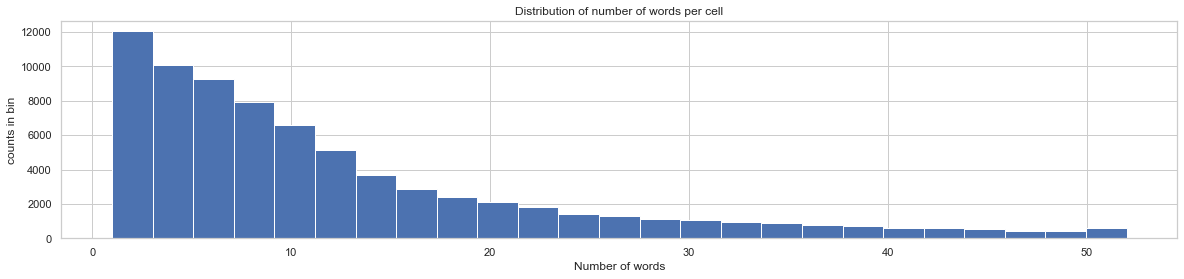

In [524]:
x = balanced["Number of words"]
y = balanced["Negative"]

plt.figure(figsize=(20, 4))
plt.hist(x, bins=25)
plt.title('Distribution of number of words per cell')
plt.ylabel("counts in bin")
plt.xlabel("Number of words")
print()

### 4.2.3 Distribution of context vs. number of words 

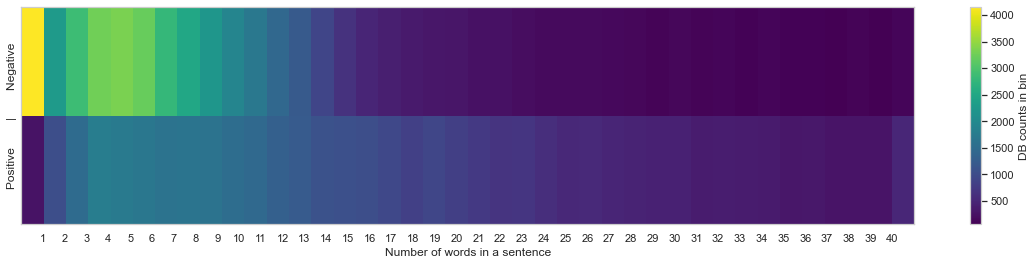

In [525]:
sorted_list = [[j, i] for j, i in sorted(zip(x, y))]
x = [i[0] for i in sorted_list]
y = [i[1] for i in sorted_list]

plt.figure(figsize=(20, 4))
plt.hist2d(x, y, bins=[40, 2], range=[[0, 41], [0,1]], cmap='viridis')
plt.ylabel("Positive        |        Negative")
plt.ylim(0, 1)
plt.yticks([])
plt.xticks(np.arange(1,41))
plt.xlabel("Number of words in a sentence")
cb = plt.colorbar()
cb.set_label('DB counts in bin')
print()

Normalizing the plot above gives us 

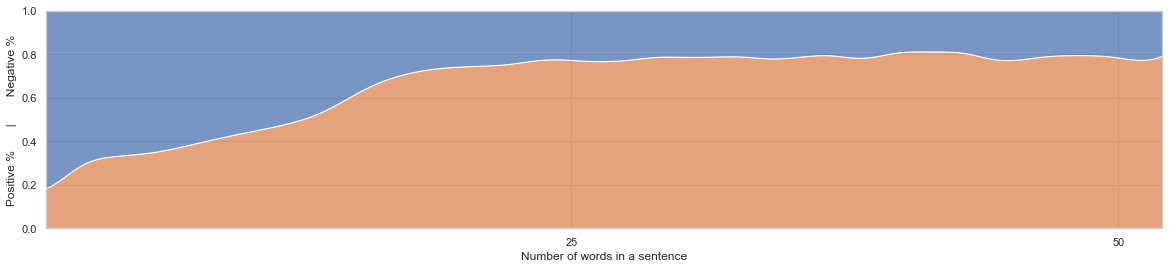

In [526]:
plt.figure(figsize=(20, 4))
data = balanced
data["Positive Percentage"] = balanced['Negative'].swifter.apply(lambda x: np.abs(1-x))
g = sns.kdeplot(data=data, x="Number of words", hue="Positive Percentage", multiple="fill", legend=False)
plt.ylabel("Positive %       |        Negative %")
plt.xlim(1, min(900, max(data["Number of words"])))
plt.xlabel("Number of words in a sentence")
plt.xticks(np.arange(25, min(900, max(data["Number of words"])), step=25))
print()

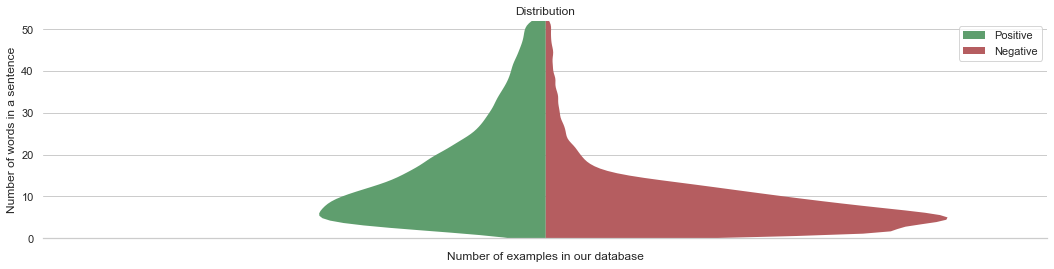

In [530]:
sns.set_theme(style="whitegrid")
labeled_hue = ["Negative" if i==1 else "Positive" for i in y] 
plt.figure(figsize=(18, 4))
sns.set_theme(style="whitegrid")
sns.violinplot(x=["" for i in x], y=x, hue=labeled_hue, split=True,
               scale="area", linewidth=0, palette={"Negative": "r", "Positive": "g"})
plt.ylabel("Number of words in a sentence")
plt.xlabel("Number of examples in our database")
plt.title('Distribution')
plt.ylim(0, max(x))
sns.despine(left=True)

### 4.2.4 Distribution of average words legnth 

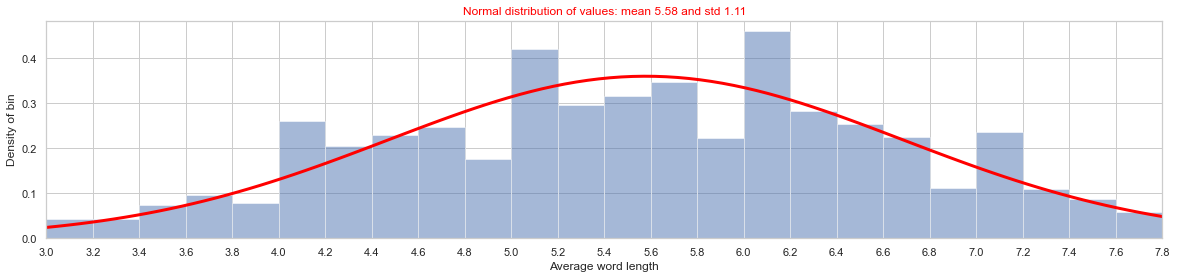

In [531]:
y = balanced["Negative"]
x = balanced["AverageLength"] 
plt_max_range = int(np.percentile(x, 99)) 
plt_min_range = int(np.percentile(x, 1))
xRangeArr = np.arange(plt_min_range, plt_max_range, step=0.2)

xx = [i for i in x if ((i>= plt_min_range) and (i<= plt_max_range))]

mu, std = stats.norm.fit(xx) 

plt.figure(figsize=(20, 4))
plt.hist(x, bins=len(xRangeArr), density=True, range=[plt_min_range, plt_max_range], alpha=0.5)
plt.title('Distribution of average word length in a sentence')
plt.ylabel("Density of bin")
plt.xlabel("Average word length")
plt.xticks(xRangeArr)
xmin, xmax = xRangeArr[0], xRangeArr[-1]
plt.xlim(xmin, xmax)
xx = np.linspace(xmin, xmax, 100)
pp = stats.norm.pdf(xx, mu, std)
plt.plot(xx, pp, linewidth=3, color="red")
title = "Normal distribution of values: mean {:.2f} and std {:.2f}".format(mu, std)
plt.title(title, color="red")

print()

### 4.2.5 Distribution of context vs. average words legnth

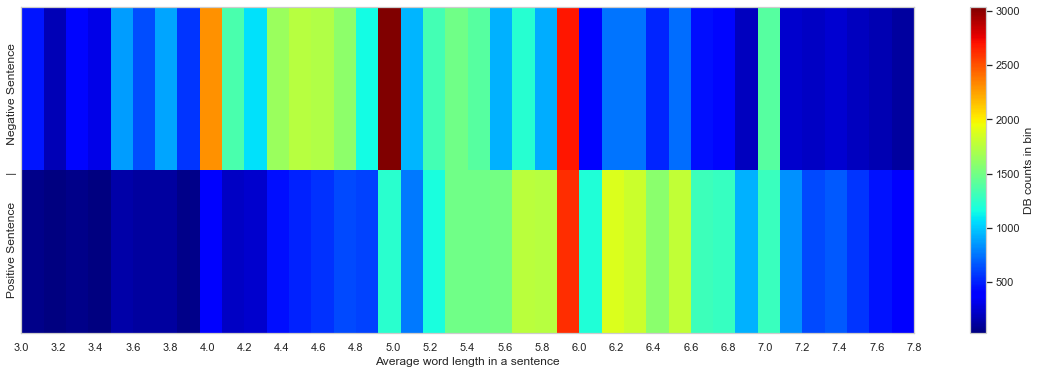

In [532]:
plt.figure(figsize=(20, 6))
plt.hist2d(x, y, bins=[40, 2], range=[[xRangeArr[0], xRangeArr[-1]], [0,1]], cmap=plt.cm.jet)
plt.ylabel("Positive Sentence        |        Negative Sentence")
plt.ylim(0, 1)
plt.yticks([])
plt.xticks(xRangeArr)
plt.xlabel("Average word length in a sentence")
cb = plt.colorbar()
cb.set_label('DB counts in bin')

Normalizing the plot above gives us 

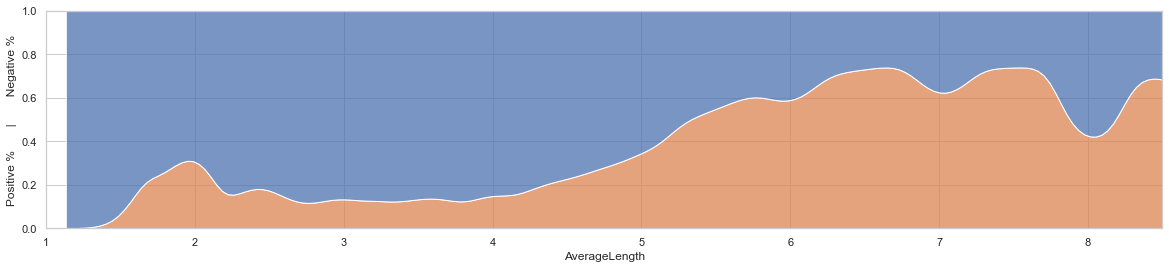

In [534]:
plt.figure(figsize=(20, 4))
sns.kdeplot(data=data, x="AverageLength", hue="Positive Percentage", multiple="fill", legend=False)
plt.ylabel("Positive %       |        Negative %")
plt.xlim(1, min(15, max(balanced["AverageLength"])))
plt.xticks(np.arange(1, min(15, max(balanced["AverageLength"])), step=1))
print()

### 4.2.6 Early conclusions

1. There are more possible positive words available than negative words(or sentences) in our database
2. We have more "short" sentences (or even single word) than long
3. Single word cells are usually negative in our case
4. Distribution of words legnth looks like normal distribution
5. Looks like 2-4 letters words or more common to be offensive where 6-8 letters are more common to be safe

Text(0.5, 1.0, 'Logistic regression of our data, blue indicated low number of words')

<Figure size 1440x1440 with 0 Axes>

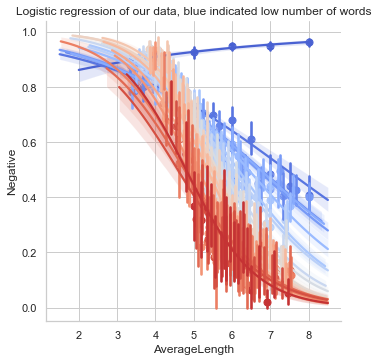

In [614]:
plotting_data = balanced[balanced["Number of words"]<=20]
plotting_data = plotting_data.sort_values(by=['Number of words'])

plt.figure(figsize=(20, 20))
g = sns.lmplot(x="AverageLength", y="Negative", hue="Number of words", 
           x_bins = 20,
           logistic=True, data=plotting_data, 
           palette="coolwarm", legend=False)
plt.title("Logistic regression of our data, blue indicated low number of words")
print()

C:\Users\vital\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vital\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 84.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vital\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vital\AppData\Local\Packages\PythonSo

<AxesSubplot:xlabel='AverageLength', ylabel='Number of words'>

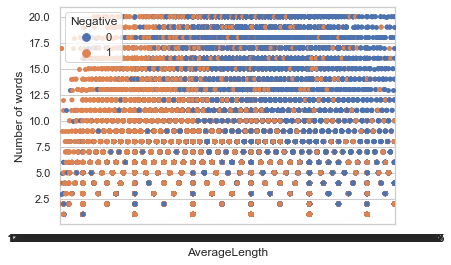

In [ ]:
sns.swarmplot(x="AverageLength", y="Number of words", hue="Negative", data=plotting_data)

## 4.3 Word Embeddings 

### 4.3.1 What are Word Embeddings?
Word Embeddings are the texts converted into numbers. There may be different numerical representations of the same text.
Many Machine Learning algorithms and almost all Deep Learning Architectures are incapable of processing strings or plain text in their raw form. They require numbers as inputs to perform any sort of job, be it classification, regression, etc. in broad terms.

### 4.3.2 Method 1 - Bag of words and TfidfVectorizerion

#### 4.3.2.1 The Bag of Words (BoW) 
BoW is the simplest form of text representation in numbers. Like the term itself, we can represent a sentence as a bag of words vector (a string of numbers).

#### 4.3.2.2 TfidfVectorizerion is CountVectorizer (bag of words) with TfidfTransformer.
This means we basically fitst count the number of occurrences for all token and later we normalize it according to the frequencies. 

Term Frequent (Tf - CountVectorizer) is a measure of how frequently a term, t, appears in our dataset.
Inverse Document Frequency (idf) is a measure of how important a term is. We need the IDF value because computing just the Tf alone is not sufficient to understand the importance of words. 

Hence, we see that words like “is”, “this”, “and”, etc., are reduced to values closer to 0 and have little importance; while words like “smart”, “amazing”, etc. are words less frequent, thus with more importance.

![Bag_of_words](ipnb_images\\bag_of.png)



#### 4.3.2.3 N Grams
In addition, sentences can be splitted into "N grams", which basically means how many word tokens we take together.

![n_gram_example](ipnb_images\\n_gram_example.png)


Selecting the N grams range to (1,2), will provide us the following output:

('Bi-grams are cool!') == (['bi', 'grams', 'are', 'cool', 'bi grams', 'grams are', 'are cool'])



#### 4.3.2.4 An advantage with count vector (and Tfidf):
Count Vector and TF-IDF are quite easy to understand and the implementation is fairly fast to deploy.

#### 4.3.2.5 A clear disadvatange with count vector (and Tfidf):
Count Vector and TF-IDF do not capture the position in semantics, co-occurrences in the document, etc.

#### 4.3.2.6 SVD
SVD or singular value decomposition is a factorization of a matrix. It generalizes the eigendecomposition of a square normal matrix with an orthonormal eigenbasis to any m * n matrix and it is related to the polar decomposition.
The SVD include computing the pseudoinverse, matrix approximation, and determining the rank, range, and null space of a matrix. By creating an SVD we, sometimes, can decrease the amount of features we need to train a model to anticipate are results while keeping high accuracy.
In our case our issue is that the dimensions of the matrix change very often (new words are added very frequently and corpus might change in size).
Also, the matrix is extremely sparse since most words do not cooccur. There are also many features so that the reduction is somehow limmited. 
Quadratic cost to train (i.e. to perform SVD). 

The elements of Sigma, namely σ₁, σ₂,… σₙ are the non-zero singular values of our Sparse Matrix "X". The higher their value the more effect 

#### 4.3.2.7 Implementation

##### Parameters

In [ ]:
# Enable

bow_run = True # True/False to activate/deactivate 
save = True
svm = True
bernoulli_bayes = True
multinomial_bayes = True
complement_bayes = True
logistic = True
random_forest = True
neigbors = True
tree = True

neural = True

# Major effect on runtime
ngram_range = (1,1)

max_iter_runtime = 10**5  # For LinearSVC
tolerance = 10**(-2)      # For LinearSVC

neighbors = 10            # K-Neighbors

min_samples_split = 2    # Decision Tree
min_samples_leaf = 1     # Decision Tree

k_fold = 5               # K fold cross validation (CV)

nb_epoch=3
batch_size=32

##### BoW words vector

In [58]:
if bow_run:

    X = balanced["sentences"]
    y = balanced['Negative']
    
    
    train, test = np.split(balanced, [int(.8*len(balanced))])
    

    bag_of_words = TfidfVectorizer(stop_words="english", use_idf=True)
    X = bag_of_words.fit_transform(X) 

    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=False)
    
    if save:
        dump(bag_of_words, "saved_runs/bag_of_words.joblib")
        dump(X_train, "saved_runs/X.joblib")
        
    ## Accuracy, Precision, Recall

    classes = ["Positive", "Negative"]
    y_test_array = pd.get_dummies(y_test, drop_first=False).values

##### Plotting the words - most of our tokens are quite unique

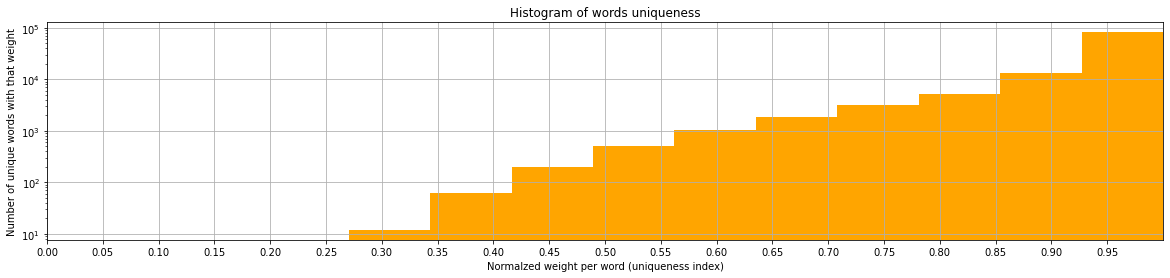

In [59]:
idf_vector = bag_of_words.idf_ 
idf_vector = idf_vector / np.max(idf_vector)
counts, bins = np.histogram(idf_vector)



figure = plt.figure(figsize=(20, 4))
plt.hist(bins[:-1], bins=bins, weights=counts, color="Orange", log=True)
plt.title('Histogram of words uniqueness')
plt.xlabel('Normalzed weight per word (uniqueness index)')
plt.ylabel('Number of unique words with that weight')
plt.grid(True)
plt.xticks(np.arange(0, 1, step=0.05))
plt.xlim(0, 1)

print("n_samples: %d, n_features: %d" % X.shape)

White dots are non zero values


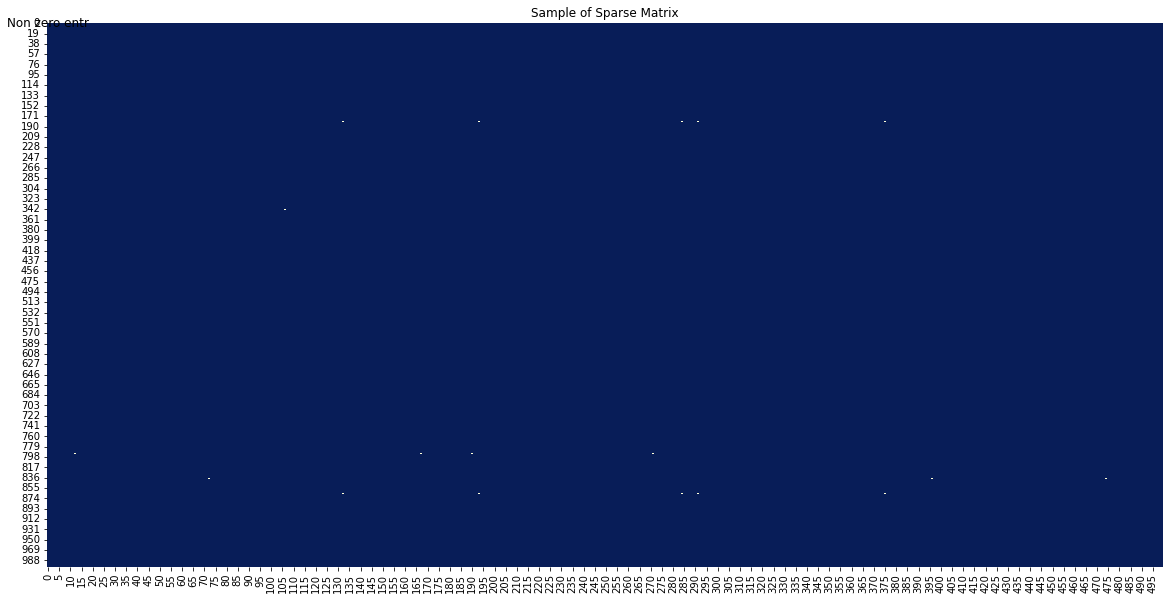

In [60]:
figure = plt.figure(figsize=(20, 10))
sns.heatmap(X_train[0:1000].todense()[:,np.random.randint(0,100,500)]==0, vmin=0, vmax=1, cmap="YlGnBu",cbar=False).set_title('Sample of Sparse Matrix')
plt.text(0.5, 0.5, 'Non zero entr', horizontalalignment='center', verticalalignment='center', size="large")
print("White dots are non zero values")

Sparse matrices are those matrices that have the majority of their elements equal to zero. In other words, the sparse matrix can be defined as the matrix that has a greater number of zero elements than the non-zero elements.
Storing only the non-zero values and their positions is a common technique in storing sparse data sets and thus avoiding handling a sparse matrix as a dense one which makes excessive use of memory.

##### SVD:
The dimensions of the matrix change very often (new words are added very frequently and corpus changes in size).
The matrix is extremely sparse since most words do not cooccur. There are also many features so that the reduction is somehow limmited. 
Quadratic cost to train (i.e. to perform SVD). The elements of Sigma, namely σ₁, σ₂,… σₙ are the non-zero singular values of our Sparse Matrix "X".  


# NOTE: NOT FINISHED YET!!!!

In [561]:
svd = TruncatedSVD(n_components=10000, n_iter=100, random_state=42)
tfidf_lsa_data = svd.fit_transform(X)
Sigma = svd.singular_values_
V_T = svd.components_.T

TypeError: __init__() missing 1 required positional argument: 'dtype'

27.312994256437964
24.30473853769656
19.34759706193915
17.842267386339156
16.590133712918398
16.408700252384502
15.864974946474197
15.414347886684132
14.800023238204059
14.101178397089294


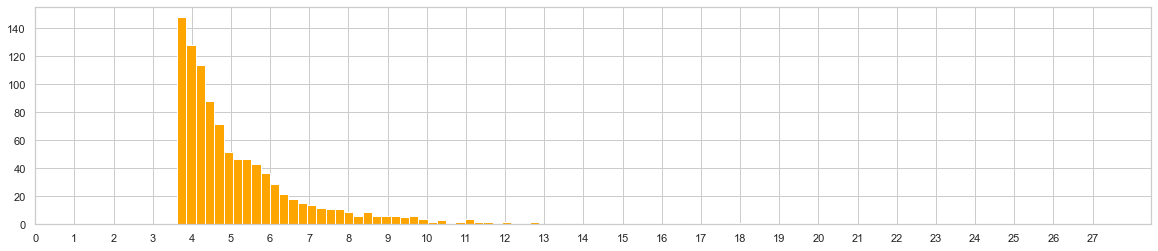

In [536]:
plt.figure(figsize=(20, 4))
counts, bins = np.histogram(Sigma, bins=int(len(Sigma)/10))
plt.hist(bins[:-1], bins=bins, weights=counts, color="Orange")
plt.xticks(np.arange(0, np.max(Sigma), step=1))

In [558]:
np.min(bag_of_words.idf_)

3.1582192222120793

In [552]:
print(V_T[0])

[ 2.35310520e-03 -3.25847842e-03 -2.88965681e-04  1.07207065e-04
  3.82013019e-04  6.27324396e-05  5.50711800e-04 -2.86648187e-03
 -9.25354543e-04  1.52422665e-03 -2.09571835e-03 -1.76997249e-03
  4.71469755e-04  1.71084427e-03 -2.61387742e-03 -3.16263552e-03
  1.78171816e-03 -4.43872829e-04 -4.92517824e-03  1.44750558e-03
 -1.44304405e-03 -4.72964390e-03 -5.44949004e-03  1.67935348e-03
 -5.62945884e-04  1.89905116e-03 -2.16991212e-03  7.32374867e-04
  1.12759390e-03 -1.91750908e-04  1.23097765e-03 -6.81764194e-04
 -7.76783347e-04  4.79142851e-04 -2.21085392e-04 -5.13109252e-03
  1.34889969e-03  3.12076734e-03 -7.71520984e-03  8.50667902e-04
 -7.45253316e-04 -4.62156120e-03  1.57252058e-03 -6.05633751e-03
 -1.60126123e-02  1.34095144e-02  9.31328426e-03  5.91980924e-02
  3.01436858e-03  2.08714461e-03 -3.85672484e-03  2.88410840e-03
  5.72656904e-03 -7.99336429e-03  2.89836782e-04 -2.26761664e-03
  9.05367424e-04 -2.30149836e-03  6.92454916e-03 -4.79442673e-03
  1.62776216e-03 -1.66705

Co-Occurrence Matrix with a fixed context window
The big idea — Similar words tend to occur together and will have a similar context for example — Apple is a fruit. Mango is a fruit.

# 5. The Models

#### All of our posible models are based on the idea that some words can have more than 1 meaning. How to decide whether a word has a negative or positive context is not an easy task. While some words are clearly offensive, some may or may not be offensive. Thus the splitting of the data have a critical effect of the learning and validation process. One way to overcome overfitting and reach the best results it is to use cross validation.


Also, in our case we have a new, untrained model.
We will create our CalibratedClassifierCV. With cv in the parameters as the number of folds.
We later fit the model. Because our model is untrained, X and y have to be used for both training and calibration. 
The way to ensure the data is 'disjoint' is our cross validation: 
for any given fold, CCCV will split X and y into your training and calibration data, so they do not overlap.

![k_fold](ipnb_images\\k_fold.jpeg)

## 5.1 Naive Bayes - Bernoulli, Multinomial, Complement . In our case Multinomial.

Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem

![Naive_bayes](ipnb_images\Naive_bayes.png)

In plain English, this equation is used to answer the following question. “What is the probability of y (my output variable) given X?

In spite of their apparently over-simplified assumptions, naive Bayes classifiers have worked quite well in many real-world situations, famously document classification and spam filtering. They require a small amount of training data to estimate the necessary parameters.
Naive Bayes learners and classifiers can be extremely fast compared to more sophisticated methods. The decoupling of the class conditional feature distributions means that each distribution can be independently estimated as a one dimensional distribution. This in turn helps to alleviate problems stemming from the curse of dimensionality.

##### We have added 3 examples of Naive Bayes models that might fit our needs. 
Bare in mind the Bag Of Words can be repesented as counts, binary and freq and each one of them might have different outcomes. 


#### Multinomial Naive Bayes: 
Feature vectors represent the frequencies with which certain events have been generated by a multinomial distribution. This is the event model typically used for document classification which is our case.
Our assumption is that Multinomial Naive Bayes will best fit our needs with our frequency vector

##### Bernoulli Naive Bayes: 
In the multivariate Bernoulli event model, features are independent booleans (binary variables) describing inputs. Like the multinomial model, this model is popular for document classification tasks, where binary term occurrence(i.e. a word occurs in a document or not) features are used rather than term frequencies(i.e. frequency of a word in the document)

##### Complement Naive Bayes:
The Complement Naive Bayes classifier was designed to correct the “severe assumptions” made by the standard Multinomial Naive Bayes classifier. It is particularly suited for imbalanced data sets.
Feel free to read more here: [Rennie et al. (2003)](https://people.csail.mit.edu/jrennie/papers/icml03-nb.pdf)


In [61]:
if bow_run:
# Naive Bayes
    if bernoulli_bayes:
        model = BernoulliNB()
        calibrated = CalibratedClassifierCV(base_estimator=model,cv=k_fold)
        calibrated.fit(X_train, y_train)
        score = calibrated.score(X_test, y_test)
        result["BernoulliNB"] = score
        print("Score for bernoulli_bayes classifier with fold={} = {} %".format(k_fold, score))
        if save:
            dump(calibrated, "saved_runs/bernoulli_bayes_calibrated.joblib")
    
    if complement_bayes:
        model = ComplementNB()
        calibrated = CalibratedClassifierCV(base_estimator=model,cv=k_fold)
        calibrated.fit(X_train, y_train)
        score = calibrated.score(X_test, y_test)
        result["ComplementNB"] = score
        print("Score for complement_bayes classifier with fold={} = {} %".format(k_fold, score))
        if save:
            dump(calibrated, "saved_runs/complement_bayes_calibrated.joblib")
    
    if multinomial_bayes:
        model = MultinomialNB()
        calibrated = CalibratedClassifierCV(base_estimator=model,cv=k_fold)
        calibrated.fit(X_train, y_train)
        score = calibrated.score(X_test, y_test)
        result["MultinomialNB"] = score
        print("Score for multinomial_bayes classifier with fold={} = {} %".format(k_fold, score))
        if save:
            dump(calibrated, "saved_runs/multinomial_bayes_calibrated.joblib")
            
    
            
            

Score for bernoulli_bayes classifier with fold=5 = 0.7662479206103368 %
Score for complement_bayes classifier with fold=5 = 0.9036884070441118 %
Score for multinomial_bayes classifier with fold=5 = 0.9036884070441118 %


Accuracy:        0.9         
Auc:             0.04             
Detail:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      8652
           1       0.92      0.89      0.90      8781

    accuracy                           0.90     17433
   macro avg       0.90      0.90      0.90     17433
weighted avg       0.90      0.90      0.90     17433



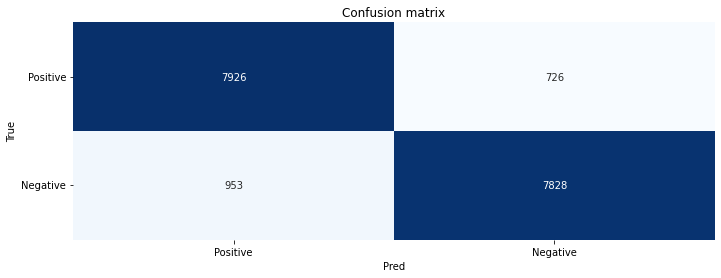

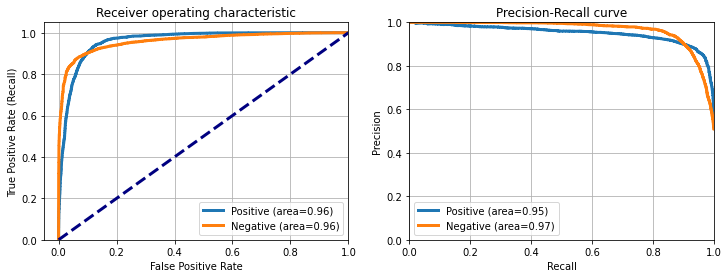

In [62]:
predicted = calibrated.predict(X_test)
predicted_prob = calibrated.predict_proba(X_test)

res1, res2 = map(list, zip(*predicted_prob))

accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, res1, multi_class="ovr")
print("Accuracy:{:^20}".format(round(accuracy,2)))
print("Auc:{:^30}".format(round(auc,2)))
print("Detail:")
print(metrics.classification_report(y_test, predicted))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)
plt.gcf().set_size_inches(11.5, 4)

fig, ax = plt.subplots(nrows=1, ncols=2)
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  predicted_prob[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)
    
## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.gcf().set_size_inches(12, 4)
plt.xlim(0, 1)
plt.ylim(0, 1)
print(end="")

## 5.2 K-Neighbors classifier

The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems. The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other

As we increase the value of K, that is the number of neihbors, our predictions become more stable due to majority voting / averaging, and thus, more likely to make more accurate predictions (up to a certain point). Eventually, we begin to witness an increasing number of errors. It is at this point we know we have pushed the value of K too far.

##### Clear disadvantage is that:
If we look mathematically, the simple intuition is to calculate the euclidean distance from point of interest ( of whose class we need to determine) to all the points in training set. Then we take class with majority points. This is called brute force method.
For N samples in D dimensions the running time complexity turns out to be O[DN²]. If we have small number of dimensions and training set, this would run in reasonable time. But as the training set size increases, the running time grows quickly.
Brute force performs worst when there are large dimensions and large training set.

With SKLearn fitting on sparse input always uses brute force method

![KNN](ipnb_images\\KNN.png)

In [63]:
if bow_run:
# K-Neighbors classifier
    if neigbors:
                          
        model = KNeighborsClassifier(n_neighbors=neighbors)
        calibrated = CalibratedClassifierCV(base_estimator=model,cv=k_fold)
        calibrated.fit(X_train, y_train)
        score = calibrated.score(X_test, y_test)
        result["KNeighborsClassifier"] = score
        print("Score for K-Neighbors classifier with neighbors={}, fold={} > {} %".format(neighbors, k_fold, score))
        
        if save:
            dump(calibrated, "saved_runs/kneighbors_calibrated.joblib")

Score for K-Neighbors classifier with neighbors=10, fold=5 > 0.6154419778580852 %


Accuracy:        0.62        
Auc:             0.32             
Detail:
              precision    recall  f1-score   support

           0       0.61      0.64      0.62      8652
           1       0.63      0.59      0.61      8781

    accuracy                           0.62     17433
   macro avg       0.62      0.62      0.62     17433
weighted avg       0.62      0.62      0.62     17433



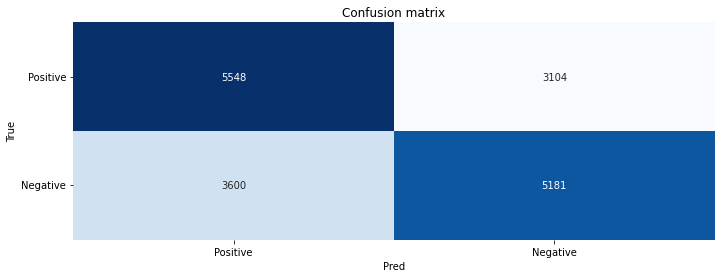

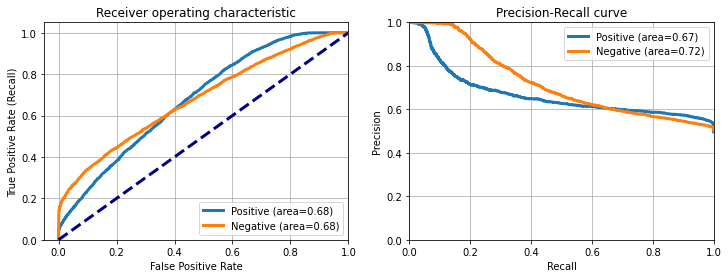

In [64]:
predicted = calibrated.predict(X_test)
predicted_prob = calibrated.predict_proba(X_test)

res1, res2 = map(list, zip(*predicted_prob))

accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, res1, multi_class="ovr")
print("Accuracy:{:^20}".format(round(accuracy,2)))
print("Auc:{:^30}".format(round(auc,2)))
print("Detail:")
print(metrics.classification_report(y_test, predicted))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)
plt.gcf().set_size_inches(11.5, 4)

fig, ax = plt.subplots(nrows=1, ncols=2)
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  predicted_prob[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)
    
## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.gcf().set_size_inches(12, 4)
plt.xlim(0, 1)
plt.ylim(0, 1)
print(end="")

## 5.3 Decision tree

Each node splits the decision and the more nodes we have, the more accurate the decision tree will be. 
The last nodes of the decision tree, the leaf, is where the decision is being made.

![tree_image](ipnb_images\\tree_image.png)

In [65]:
if bow_run:
# Decision tree classifier
    if tree:
                          
        model = DecisionTreeClassifier(min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
        calibrated = CalibratedClassifierCV(base_estimator=model,cv=k_fold)
        calibrated.fit(X_train, y_train)
        score = calibrated.score(X_test, y_test)
        result["DecisionTreeClassifier"] = score
        print("Score for Decision tree classifier with min_samples_split={}, min_samples_leaf={}, fold={} > {} %".format(min_samples_split, min_samples_leaf, k_fold, score))
           
        if save:
            dump(calibrated, "saved_runs/tree_calibrated.joblib")

Score for Decision tree classifier with min_samples_split=2, min_samples_leaf=1, fold=5 > 0.8918717375093214 %


Accuracy:        0.89        
Auc:             0.06             
Detail:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      8652
           1       0.92      0.86      0.89      8781

    accuracy                           0.89     17433
   macro avg       0.89      0.89      0.89     17433
weighted avg       0.89      0.89      0.89     17433



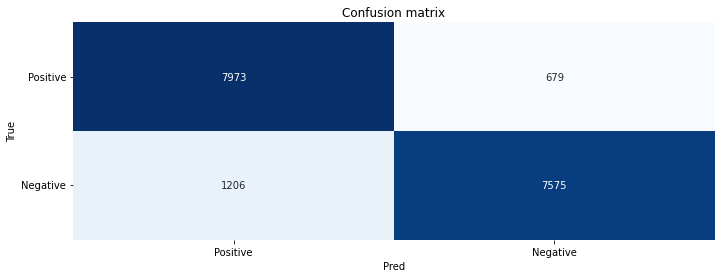

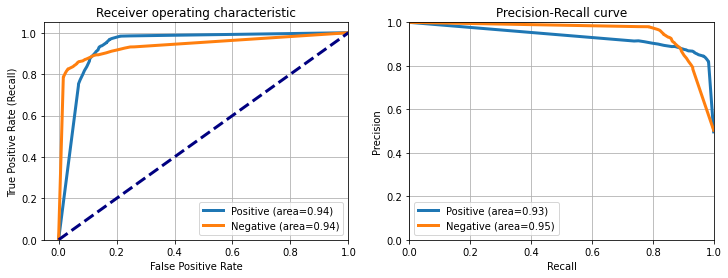

In [66]:
predicted = calibrated.predict(X_test)
predicted_prob = calibrated.predict_proba(X_test)

res1, res2 = map(list, zip(*predicted_prob))

accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, res1, multi_class="ovr")
print("Accuracy:{:^20}".format(round(accuracy,2)))
print("Auc:{:^30}".format(round(auc,2)))
print("Detail:")
print(metrics.classification_report(y_test, predicted))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)
plt.gcf().set_size_inches(11.5, 4)

fig, ax = plt.subplots(nrows=1, ncols=2)
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  predicted_prob[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)
    
## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.gcf().set_size_inches(12, 4)
plt.xlim(0, 1)
plt.ylim(0, 1)
print(end="")

## 5.4 RandomForestClassifier
Random forests are an ensemble learning technique that builds off of decision trees. Random forests involve creating multiple decision trees using bootstrapped datasets of the original data and randomly selecting a subset of variables at each step of the decision tree. The model then selects the mode of all of the predictions of each decision tree. What’s the point of this? By relying on a “majority wins” model, it reduces the risk of error from an individual tree

![random-forest](ipnb_images\random-forest.png)

In [67]:
if bow_run:
# RandomForestClassifier
    if random_forest:
        model = RandomForestClassifier()
        calibrated = CalibratedClassifierCV(base_estimator=model,cv=k_fold)
        calibrated.fit(X_train, y_train)
        score = calibrated.score(X_test, y_test)
        result["LogisticRegression"] = score
        print("Score for RandomForestClassifier classifier with fold={} > {} %".format(k_fold, score))
           
        if save:
            dump(calibrated, "saved_runs/RandomForestClassifier_calibrated.joblib")

Score for RandomForestClassifier classifier with fold=5 > 0.8962886479665003 %


Accuracy:        0.9         
Auc:             0.04             
Detail:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      8652
           1       0.92      0.87      0.89      8781

    accuracy                           0.90     17433
   macro avg       0.90      0.90      0.90     17433
weighted avg       0.90      0.90      0.90     17433



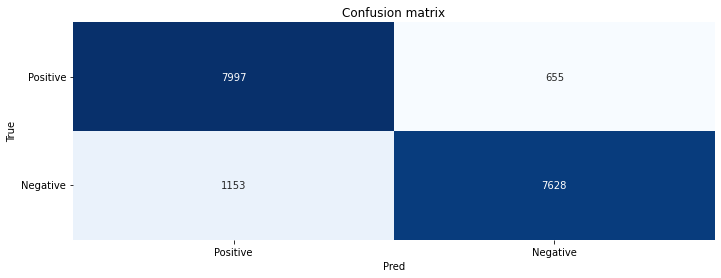

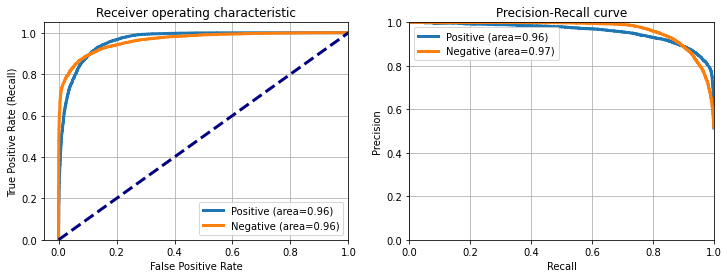

In [68]:
predicted = calibrated.predict(X_test)
predicted_prob = calibrated.predict_proba(X_test)

res1, res2 = map(list, zip(*predicted_prob))

accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, res1, multi_class="ovr")
print("Accuracy:{:^20}".format(round(accuracy,2)))
print("Auc:{:^30}".format(round(auc,2)))
print("Detail:")
print(metrics.classification_report(y_test, predicted))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)
plt.gcf().set_size_inches(11.5, 4)

fig, ax = plt.subplots(nrows=1, ncols=2)
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  predicted_prob[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)
    
## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.gcf().set_size_inches(12, 4)
plt.xlim(0, 1)
plt.ylim(0, 1)
print(end="")

## 5.5 Logistic regression
Logistic regression is similar to linear regression but is used to model the probability of a finite number of outcomes, typically two. There are a number of reasons why logistic regression is used over linear regression when modeling probabilities of outcomes (see here). In essence, a logistic equation is created in such a way that the output values can only be between 0 and 1

![Logistic-regression-and-linear_regression](ipnb_images\Logistic-regression-and-linear_regression.png)

In [69]:
if bow_run:
# LogisticRegression
    if logistic:
        model = LogisticRegression()
        calibrated = CalibratedClassifierCV(base_estimator=model,cv=k_fold)
        calibrated.fit(X_train, y_train)
        score = calibrated.score(X_test, y_test)
        result["LogisticRegression"] = score
        print("Score for LogisticRegression classifier with fold={} > {} %".format(k_fold, score))
           
        if save:
            dump(calibrated, "saved_runs/logistic_reg_calibrated.joblib")

C:\Users\vital\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Score for LogisticRegression classifier with fold=5 > 0.928698445476969 %


Accuracy:        0.93        
Auc:             0.03             
Detail:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      8652
           1       0.94      0.92      0.93      8781

    accuracy                           0.93     17433
   macro avg       0.93      0.93      0.93     17433
weighted avg       0.93      0.93      0.93     17433



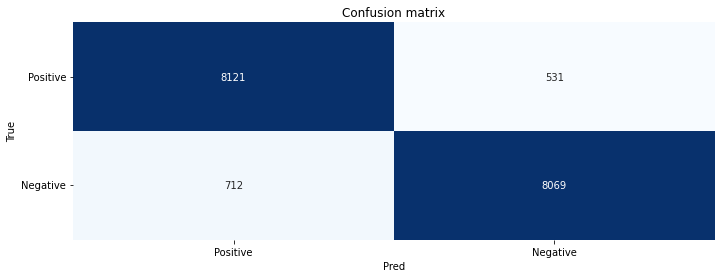

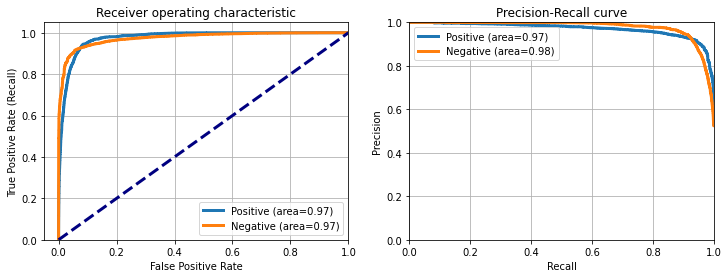

In [70]:
predicted = calibrated.predict(X_test)
predicted_prob = calibrated.predict_proba(X_test)

res1, res2 = map(list, zip(*predicted_prob))

accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, res1, multi_class="ovr")
print("Accuracy:{:^20}".format(round(accuracy,2)))
print("Auc:{:^30}".format(round(auc,2)))
print("Detail:")
print(metrics.classification_report(y_test, predicted))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)
plt.gcf().set_size_inches(11.5, 4)

fig, ax = plt.subplots(nrows=1, ncols=2)
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  predicted_prob[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)
    
## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.gcf().set_size_inches(12, 4)
plt.xlim(0, 1)
plt.ylim(0, 1)
print(end="")

## 5.6 Support Vector Machine

SVM tries to finds the “best” margin (distance between the line and the support vectors) that separates the classes and this reduces the risk of error on the data.
SVM works well with unstructured and semi-structured data like text and images while logistic regression works with already identified independent variables. The risk of overfitting is less in SVM, while Logistic regression is vulnerable to overfitting.
The algorithm creates a hyperplane or line(decision boundary) which separates data into classes. It uses the kernel trick to find the best line separator (decision boundary that has same distance from the boundary point of both classes)


![Support Vector Machine](ipnb_images\Dim_transofrmation.png)
![SVM_Img](ipnb_images\SVM_Img.png)


In [71]:
if bow_run:
# Linear support vector machine
    if svm:
         
        model = LinearSVC(dual=False, tol=tolerance, max_iter=max_iter_runtime)
        calibrated = CalibratedClassifierCV(base_estimator=model,cv=k_fold)
        calibrated.fit(X_train, y_train)
        score = calibrated.score(X_test, y_test)
        result["SVM"] = score
        print("Score for Linear support vector machine with fold={} = {} %".format(k_fold, score))
        # CalibratedClassifierCV - 
        # This class uses cross-validation to both estimate the parameters of a classifier and subsequently calibrate a classifier
        # fits a copy of the base estimator to the training subset, and calibrates it using the testing subset      
        
        if save:
            dump(calibrated, "saved_runs/linear_svc_calibrated.joblib")

Score for Linear support vector machine with fold=5 = 0.9340905179831355 %


Accuracy:        0.93        
Auc:             0.02             
Detail:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      8652
           1       0.96      0.91      0.93      8781

    accuracy                           0.93     17433
   macro avg       0.93      0.93      0.93     17433
weighted avg       0.94      0.93      0.93     17433



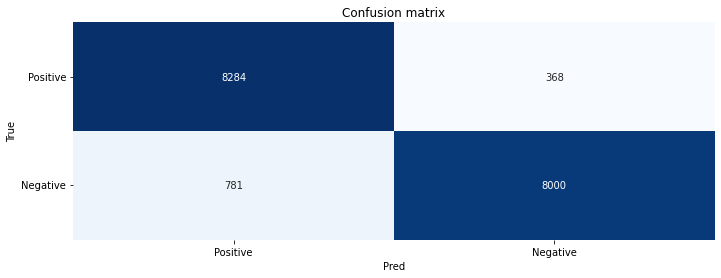

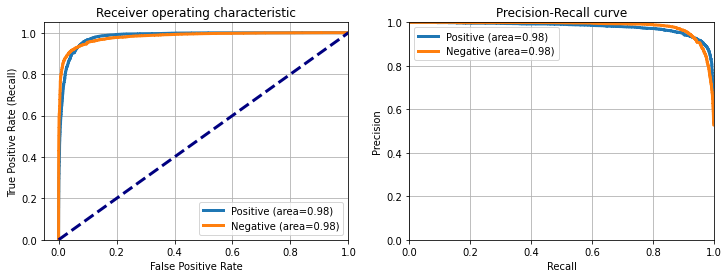

In [72]:
predicted = calibrated.predict(X_test)
predicted_prob = calibrated.predict_proba(X_test)

res1, res2 = map(list, zip(*predicted_prob))

accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, res1, multi_class="ovr")
print("Accuracy:{:^20}".format(round(accuracy,2)))
print("Auc:{:^30}".format(round(auc,2)))
print("Detail:")
print(metrics.classification_report(y_test, predicted))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)
plt.gcf().set_size_inches(11.5, 4)

fig, ax = plt.subplots(nrows=1, ncols=2)
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  predicted_prob[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)
    
## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.gcf().set_size_inches(12, 4)
plt.xlim(0, 1)
plt.ylim(0, 1)
print(end="")

In [73]:
print("\tScore summary for bag of words\n")
for key in result:
    print("{:<22}: {:>22}".format(key, result[key]))
    
print("\n\n\t\t  Max value\n")
print("{:<22}: {:>22}".format(max(result), result[max(result)]))

	Score summary for bag of words

BernoulliNB           :     0.7662479206103368
ComplementNB          :     0.9036884070441118
MultinomialNB         :     0.9036884070441118
KNeighborsClassifier  :     0.6154419778580852
DecisionTreeClassifier:     0.8918717375093214
LogisticRegression    :      0.928698445476969
SVM                   :     0.9340905179831355


		  Max value

SVM                   :     0.9340905179831355


##### Linear support vector machine recievs the best score with

#### Early Results

In [74]:
sample_text_a = ["You are shit"]
sample_text_b = ["Fuck"]
sample_text_c = ["I love you"]
sample_text_d = ["Idan is the best teach in the Open University"]
sample_text_e = ["I suck the water outside of the ship"]
sample_text_f = ["I drain the water outside of the ship"]
sample_text_g = ["The data I am using might or might not be refined to be better"]


list_of_samples = [sample_text_a, sample_text_b, sample_text_c, sample_text_d, sample_text_e, sample_text_f, sample_text_g]

def _get_prob(prob):
  return prob[1]
    
def probability(texts):
  return np.apply_along_axis(_get_prob, 1, calibrated.predict_proba(bag_of_words.transform(texts)))  


# Print the result per sample
for sample in list_of_samples:
    print(np.abs(1-calibrated.predict(bag_of_words.transform(sample))), end="")
    prob = probability(sample)
    if prob[0] >= 0.5:
        print("Negative {}%: {}".format(int(np.round(prob[0], 2)*100), sample))
    else:
        print("Positive {}%: {}".format(int(np.round(1-prob[0], 2)*100), sample))


[0]Negative 100%: ['You are shit']
[0]Negative 100%: ['Fuck']
[1]Positive 88%: ['I love you']
[1]Positive 91%: ['Idan is the best teach in the Open University']
[0]Negative 88%: ['I suck the water outside of the ship']
[1]Positive 91%: ['I drain the water outside of the ship']
[1]Positive 79%: ['The data I am using might or might not be refined to be better']


#### It can be seen that "I suck the water outside of the ship" failed

In [75]:
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf
import tensorflow_hub as hub


import transformers

from PIL import Image
import pytesseract
import cv2


### Need to complete BERT model and ELMO models

In [76]:
""" 

A lot of work has to be done here!!!!@@@

elmo = hub.Module("https://tfhub.dev/google/elmo/2", trainable=True)

def elmo_vectors(x):
    embeddings = elmo(x.tolist(), signature="default", as_dict=True)["elmo"]

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        sess.run(tf.tables_initializer())
        # return average of ELMo features
        return sess.run(tf.reduce_mean(embeddings,1))


list_train = [X_train[i:i+100] for i in range(0,X_train.shape[0],100)]
list_test = [X_test[i:i+100] for i in range(0,X_test.shape[0],100)]

elmo_train = [elmo_vectors(x) for x in list_train]
elmo_test = [elmo_vectors(x) for x in list_test]

elmo_train_new = np.concatenate(elmo_train, axis = 0)
elmo_test_new = np.concatenate(elmo_test, axis = 0)

# save 
dump(elmo_train_new, "saved_runs/elmo_train_new_calibrated.joblib")
dump(elmo_test_new, "saved_runs/elmo_test_new_calibrated.joblib")


xtrain, xvalid, ytrain, yvalid = train_test_split(elmo_train_new, y_train, test_size=0.2, shuffle=False)
lreg = LogisticRegression()
lreg.fit(xtrain, ytrain)

preds_valid = lreg.predict(xvalid)
print(metrics.f1_score(yvalid, preds_valid))

preds_test = lreg.predict(elmo_test_new)
print(metrics.f1_score(y_test, preds_test))
    
    
    
"""    

INFO:absl:Using C:\Users\vital\AppData\Local\Temp\tfhub_modules to cache modules.
INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/google/elmo/2'.
INFO:absl:Downloading https://tfhub.dev/google/elmo/2: 210.35MB
INFO:absl:Downloaded https://tfhub.dev/google/elmo/2, Total size: 357.40MB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/google/elmo/2'.


RuntimeError: Exporting/importing meta graphs is not supported when eager execution is enabled. No graph exists when eager execution is enabled.

### TensorFlow(Keras) Multilayer Perceptron forward network model with fully connected layers

![neural_layers](ipnb_images\neural_layers.png)

In [619]:
"""


Not finished - RAM issues 
if bow_run:
# neural network
    if neural:
        X_train = train["sentences"]
        y_train = train['Negative']
        X_test = test["sentences"]
        y_test = test['Negative']
        
        
        tokenizer = Tokenizer()
        tokenizer.fit_on_texts(balanced["sentences"])
        
        #Xtrain = tokenizer.texts_to_matrix(X_train, mode='binary') #  recc to set mode="binary"{yes/no} or "freq"{tfidf}
        #Xtest = tokenizer.texts_to_matrix(X_test, mode='binary')   #  recc to set mode="binary"{yes/no} or "freq"{tfidf}
        
        Xtrain = []
        for line in X_train:
            # Converting the lines into matrix, line-by-line.
            m = tokenizer.texts_to_matrix([line], mode='binary')[0]
            Xtrain.append(m)
        
        Xtest = []
        for line in X_test:
            # Converting the lines into matrix, line-by-line.
            m = tokenizer.texts_to_matrix([line], mode='binary')[0]
            Xtest.append(m)
        
        
        n_words = Xtest.shape[1]
        
        # define network
        model = Sequential()
        model.add(Dense(10, input_shape=(n_words,), activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        # compile network
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        # fit network
        model.fit(Xtrain, ytrain, epochs=nb_epoch, verbose=2)
        # evaluate
        loss, acc = model.evaluate(Xtest, y_test, verbose=0)
        print("loss: {}, acc: {}".format(loss, acc))
        result["network"] = acc
        
        if save:
            dump(model, "saved_runs/network_calibrated.joblib")
"""

'\n\n\nNot finished - RAM issues \nif bow_run:\n# neural network\n    if neural:\n        X_train = train["sentences"]\n        y_train = train[\'Negative\']\n        X_test = test["sentences"]\n        y_test = test[\'Negative\']\n        \n        \n        tokenizer = Tokenizer()\n        tokenizer.fit_on_texts(balanced["sentences"])\n        \n        #Xtrain = tokenizer.texts_to_matrix(X_train, mode=\'binary\') #  recc to set mode="binary"{yes/no} or "freq"{tfidf}\n        #Xtest = tokenizer.texts_to_matrix(X_test, mode=\'binary\')   #  recc to set mode="binary"{yes/no} or "freq"{tfidf}\n        \n        Xtrain = []\n        for line in X_train:\n            # Converting the lines into matrix, line-by-line.\n            m = tokenizer.texts_to_matrix([line], mode=\'binary\')[0]\n            Xtrain.append(m)\n        \n        Xtest = []\n        for line in X_test:\n            # Converting the lines into matrix, line-by-line.\n            m = tokenizer.texts_to_matrix([line], mod

## Additional features to be created for the final project

#### Image to text - recognize samples so we can later use our model to evaluate them 

In [ ]:
# Sample from "http://digitalnativestudios.com/textmeshpro/docs/rich-text/"
source_path = r"materials\images\in\image_text_sample.png"

image = cv2.imread(source_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Remove some noises, this should be later changed to be dynamic 
gray = cv2.medianBlur(gray, 3)

source_path_out = "\\".join(source_path.split("\\")[0:-2])
filename = source_path_out + "\\out\\" + "image_out.png"
cv2.imwrite(filename, gray)

# The line below runs pytesseract, changing the stdout to text file that can be later loaded to the code above 
# text = pytesseract.image_to_string(Image.open(filename))

[Google OCR](https://github.com/tesseract-ocr/tesseract)

### Voice to text - recognize samples so we can later use our model to evaluate them

###### Under development 

###### Found a cool open-source library to help split the audio into freq bins (fft) and a dataset that helps analyze feelings according the the sound (frequences, rate of change and etc)

[librosa - OpenSource](https://librosa.org/doc/latest/index.html)

[Data set]("https://www.kaggle.com/uwrfkaggler/ravdess-emotional-speech-audio")

# To do list

1. Add Bert and ELMO
2. Finialize the features
3. Clean the data better (preprocessing for the data)
4. Make a conclusion and "in a nutshell segments" 
5. Finilze notebook look